# KHAI THÁC DỮ LIỆU VÀ KHAI PHÁ TRI THỨC - Nhóm 08 - Final Project

Giảng viên: Lê Cung Tưởng

Sinh viên: 

- Nguyễn Minh Đăng Khoa - 51800882


- Trần Ngọc Dũng - 51800187

# Import Libraries

In [1]:
import pandas as pd
from pyvi import ViTokenizer
import demoji
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

from keras import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# Task 2

## Read Data

In [2]:
filename = "./UIT-VSMEC/train_nor_811.xlsx"
filename1 = "./UIT-VSMEC/test_nor_811.xlsx"
filename2 = "./UIT-VSMEC/valid_nor_811.xlsx"

In [3]:
# Vẽ xem phân bố label trong data
def plotWithLabel(df, title):
    sns.set(rc={'figure.figsize':(12,6)})
    plt.title(title)
    ax = sns.countplot(df.Emotion)
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        ax.text(p.get_x() + width / 2, height + 0.5, height, ha="center", size=15)
    plt.show()

In [4]:
# Train
df_train = pd.read_excel(filename)
df_train.head()

,Unnamed: 0,Emotion,Sentence
0,188,Other,cho mình xin bài nhạc tên là gì với ạ
1,166,Disgust,cho đáng đời con quỷ . về nhà lôi con nhà mày ...
2,1345,Disgust,lo học đi . yêu đương lol gì hay lại thích học...
3,316,Enjoyment,uớc gì sau này về già vẫn có thể như cụ này :))
4,1225,Enjoyment,mỗi lần có video của con là cứ coi đi coi lại ...


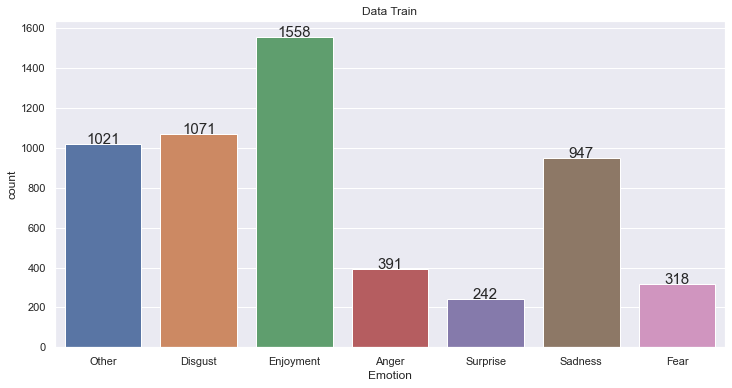

In [5]:
plotWithLabel(df_train, "Data Train")

In [6]:
# Test
df_test = pd.read_excel(filename1)
df_test.head()

,Unnamed: 0,Emotion,Sentence
0,713,Sadness,người ta có bạn bè nhìn vui thật
1,1827,Surprise,cho nghỉ viêc mói đúng sao goi là kỷ luật
2,1166,Disgust,kinh vãi 😡
3,228,Fear,nhà thì không xa lắm nhưng chưa bao giờ đi vì ...
4,1942,Anger,bố không thích nộp đấy mày thích ý kiến không


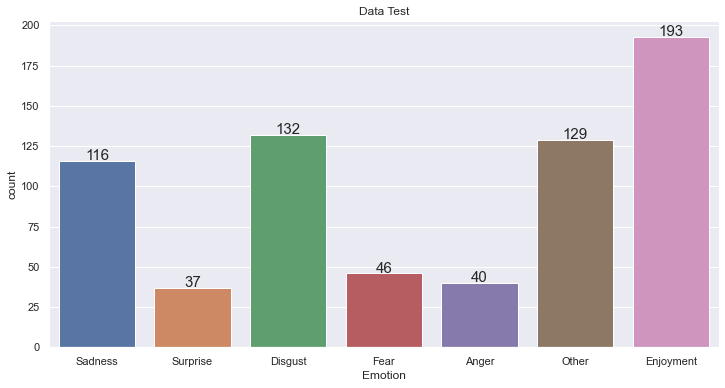

In [7]:
plotWithLabel(df_test, "Data Test")

In [8]:
# Valid
df_valid = pd.read_excel(filename2)
df_valid.head()

,Unnamed: 0,Emotion,Sentence
0,941,Other,"tính tao tao biết , chẳng có chuyện gì có thể ..."
1,142,Enjoyment,"lại là lào cai , tự hào quê mình quá :))"
2,1164,Sadness,bị từ chối rồi
3,182,Enjoyment,tam đảo trời đẹp các mem à
4,868,Other,đọc bình luận của thằng đó không thiếu chữ nào 😂😂


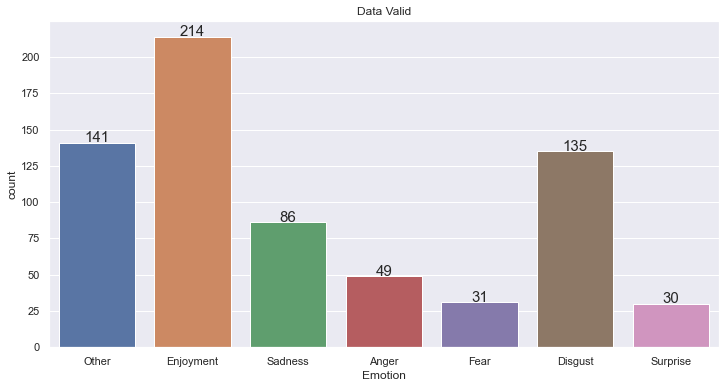

In [9]:
plotWithLabel(df_valid, "Data Valid")

In [10]:
# Bỏ col "Unnamed: 0" ở 3 df
df_train.drop(columns=["Unnamed: 0"], inplace=True)
df_test.drop(columns=["Unnamed: 0"], inplace=True)
df_valid.drop(columns=["Unnamed: 0"], inplace=True)

In [11]:
# kiểm tra có dòng nào null không?
print(df_train.isnull().sum())
print(df_test.isnull().sum())
print(df_valid.isnull().sum())

Emotion     0
Sentence    0
dtype: int64
Emotion     0
Sentence    0
dtype: int64
Emotion     0
Sentence    0
dtype: int64


## Preprocessing

In [12]:
# demoji.download_codes()

In [13]:
# Xóa Emoji
df_train["new_sentence"] = df_train.Sentence.apply(lambda x: demoji.replace(x, ""))
df_test["new_sentence"] = df_test.Sentence.apply(lambda x: demoji.replace(x, ""))
df_valid["new_sentence"] = df_valid.Sentence.apply(lambda x: demoji.replace(x, ""))

In [14]:
def text_process(mess):
    # chuyển chữ thường
    mess = mess.lower()
    
    # Bỏ những chữ đặc biệt
    mess = mess.replace("<3", "")
    mess = mess.replace(":3", "")
    mess = mess.replace("per", "")
    
    # Replace từ viết tắt
    mess = mess.replace("ak", "à")
    mess = mess.replace("ae", "anh em")
    mess = mess.replace("ko", "không")
    mess = mess.replace("hs", "học sinh")
    mess = mess.replace("trog", "trong")
    mess = mess.replace("cv", "công việc")
    mess = mess.replace("sgk", "sách giáo khoa")
    mess = mess.replace("kq", "kết quả")
    mess = mess.replace("dzầy", "vậy")
    mess = mess.replace("zay", "vậy")
    mess = mess.replace("vầy", "vậy")
    mess = mess.replace("zậy", "vậy")
    mess = mess.replace("mj", "mày")
    mess = mess.replace("nyc", "người yêu cũ")
    mess = mess.replace("del", "đéo")
    mess = mess.replace("địt mẹ", "dm")
    mess = mess.replace("đụ mẹ", "dm")
    mess = mess.replace("đcm", "dm")
    mess = mess.replace("dkm", "dm")
    mess = mess.replace("đkm", "dm")
    mess = mess.replace("dume", "dm")
    mess = mess.replace("dme", "dm")
    mess = mess.replace("đm", "dm")
    mess = mess.replace("mún", "muốn")
    mess = mess.replace("pv", "phục vụ")
    mess = mess.replace("huhuhu", "huhu")
    mess = mess.replace("ahuhuhu", "huhu")
    mess = mess.replace("hjxhjx", "huhu")
    mess = mess.replace("hiccc", "huhu")
    mess = mess.replace("híc híc", "huhu")
    mess = mess.replace("hix", "huhu")
    mess = mess.replace("vớiiiiii", "với")
    mess = mess.replace("vớiiiii", "với")
    mess = mess.replace("vớiiii", "với")
    mess = mess.replace("vớiii", "với")
    mess = mess.replace("vớii", "với")
    mess = mess.replace("hmmmmmmm", "hmm")
    mess = mess.replace("hhhhhhhhhhhhhhhhhhhhhhh", "haha")
    mess = mess.replace("ha ha", "haha")
    mess = mess.replace("hahahaha", "haha")
    mess = mess.replace("hahaha", "haha")
    mess = mess.replace("hahaaaa", "haha")
    mess = mess.replace("kkkkk", "haha")
    mess = mess.replace("kkkk", "haha")
    mess = mess.replace("kkk", "haha")
    mess = mess.replace("kk", "haha")
    mess = mess.replace("hihihihi", "haha")
    mess = mess.replace("hihihi", "haha")
    mess = mess.replace("hihi", "haha")
    mess = mess.replace("hí hí", "haha")
    mess = mess.replace("ahihi", "haha")
    mess = mess.replace("záy", "váy")
    mess = mess.replace("ukm", "ừ")
    mess = mess.replace("đag", "đang")
    mess = mess.replace("saoooo", "sao")
    mess = mess.replace("traiiii", "trai")
    mess = mess.replace("troai", "trai")
    mess = mess.replace("đấyyyyy", "đấy")
    mess = mess.replace("nhaaaaaaaa", "nha")
    mess = mess.replace("hơm", "không")
    mess = mess.replace("thươnggg", "thương")
    mess = mess.replace("tk", "thằng")
    mess = mess.replace("vlllll", "vl")
    mess = mess.replace("vllll", "vl")
    mess = mess.replace("vlll", "vl")
    mess = mess.replace("vll", "vl")
    mess = mess.replace("vailon", "vl")
    mess = mess.replace("vailol", "vl")
    mess = mess.replace("lol", "vl")
    mess = mess.replace("vlon", "vl")
    mess = mess.replace("vãi lozzzz", "vl")
    mess = mess.replace("vkl", "vl")
    mess = mess.replace("vchhhh", "vl")
    mess = mess.replace("vchhh", "vl")
    mess = mess.replace("vchh", "vl")
    mess = mess.replace("vcllll", "vl")
    mess = mess.replace("vclll", "vl")
    mess = mess.replace("vcll", "vl")
    mess = mess.replace("tks", "cám ơn")
    mess = mess.replace("đc", "được")
    mess = mess.replace("dc", "được")
    mess = mess.replace("đx", "được")
    mess = mess.replace("vãiiii", "vãi")
    mess = mess.replace("iemm", "em")
    mess = mess.replace("chuỵ", "chị")
    mess = mess.replace("hỏg", "hỏng")
    mess = mess.replace("rồiiiii", "rồi")
    mess = mess.replace("rồiiii", "rồi")
    mess = mess.replace("rồiii", "rồi")
    mess = mess.replace("rồii", "rồi")
    mess = mess.replace("caooooo", "cao")
    mess = mess.replace("ỏoo", "ỏ")
    mess = mess.replace("trờiiiiii", "trời")
    mess = mess.replace("trờiiiii", "trời")
    mess = mess.replace("trờiiii", "trời")
    mess = mess.replace("trờiii", "trời")
    mess = mess.replace("trờii", "trời")
    mess = mess.replace("chờiiiii", "trời")
    mess = mess.replace("chờiiii", "trời")
    mess = mess.replace("chờiii", "trời")
    mess = mess.replace("chờii", "trời")
    mess = mess.replace("tayyy", "tay")
    mess = mess.replace("tayy", "tay")
    mess = mess.replace("ngta", "người ta")
    mess = mess.replace("vn", "việt nam")
    mess = mess.replace("gê", "ghê")
    mess = mess.replace("gheê", "ghê")
    mess = mess.replace("nổiiiii", "nổi")
    mess = mess.replace("nổiiii", "nổi")
    mess = mess.replace("nổiii", "nổi")
    mess = mess.replace("nổii", "nổi")
    mess = mess.replace("thik", "thích")
    mess = mess.replace("cx", "cũng")
    mess = mess.replace("owiiiiii", "ơi")
    mess = mess.replace("trc", "trước")
    mess = mess.replace("wá", "quá")
    mess = mess.replace("you", "bạn")
    mess = mess.replace("why", "tại sao")
    mess = mess.replace("miss", "nhớ")
    mess = mess.replace("topic", "chủ đề")
    mess = mess.replace("hello", "xin chào")
    mess = mess.replace("adim", "admin")
    
    
    # Loại bỏ whitespace 2 đầu của mess
    mess = mess.strip()
    
    # Xóa dấu câu
    mess = [char for char in mess if char not in string.punctuation]
    mess = ''.join(mess)
    
    # replace whitespace
    mess = mess.replace("   ", " ")
    mess = mess.replace("  ", " ")
    
    # Word Segmentation
    mess = ViTokenizer.tokenize(mess)
    
    return mess

In [15]:
df_train["new_sentence1"] = df_train.new_sentence.apply(text_process)
df_test["new_sentence1"] = df_test.new_sentence.apply(text_process)
df_valid["new_sentence1"] = df_valid.new_sentence.apply(text_process)

In [16]:
# Chuyển clean text về Sentence, xóa 2 col new_sentence1, new_sentence
# Train
df_train.Sentence = df_train.new_sentence1
df_train.drop(columns=["new_sentence"], inplace=True)
df_train.drop(columns=["new_sentence1"], inplace=True)

# Test
df_test.Sentence = df_test.new_sentence1
df_test.drop(columns=["new_sentence"], inplace=True)
df_test.drop(columns=["new_sentence1"], inplace=True)

# Valid
df_valid.Sentence = df_valid.new_sentence1
df_valid.drop(columns=["new_sentence"], inplace=True)
df_valid.drop(columns=["new_sentence1"], inplace=True)

# df_train.to_excel('trainData.xlsx')

## Normalize

In [17]:
encoder = LabelEncoder()

In [18]:
# Chuẩn hóa train
df_train.Emotion = encoder.fit_transform(df_train.Emotion)
df_train.head()

,Emotion,Sentence
0,4,cho mình xin bài nhạc tên là gì với ạ
1,1,cho đáng_đời con quỷ về nhà lôi con nhà mày ra...
2,1,lo học đi yêu_đương vl gì hay lại thích học_si...
3,2,uớc gì sau_này về già vẫn có_thể như cụ này
4,2,mỗi lần có video của con là cứ coi đi coi lại ...


In [19]:
# Chuẩn hóa test
df_test.Emotion = encoder.fit_transform(df_test.Emotion)
df_test.head()

,Emotion,Sentence
0,5,người_ta có bạn_bè nhìn vui thật
1,6,cho nghỉ viêc mói đúng sao goi là kỷ_luật
2,1,kinh vãi
3,3,nhà thì không xa lắm nhưng chưa bao_giờ đi vì ...
4,0,bố không thích nộp đấy mày thích ý_kiến không


In [20]:
# Chuẩn hóa valid
df_valid.Emotion = encoder.fit_transform(df_valid.Emotion)
df_valid.head()

,Emotion,Sentence
0,4,tính tao tao biết chẳng có chuyện gì có_thể là...
1,2,lại là lào cai tự_hào quê mình quá
2,5,bị từ_chối rồi
3,2,tam_đảo trời đẹp các mem à
4,4,đọc bình_luận của thằng đó không thiếu chữ nào


In [21]:
# Train - tách Sentence ra data, Emotion ra label
data_train = []
label_train = []
for i in range(len(df_train)):
    data_train.append(df_train.Sentence[i])
    label_train.append(df_train.Emotion[i])

In [22]:
# Test - tách Sentence ra data, Emotion ra label
data_test = []
label_test = []
for i in range(len(df_test)):
    data_test.append(df_test.Sentence[i])
    label_test.append(df_test.Emotion[i])

In [23]:
# Valid - tách Sentence ra data, Emotion ra label
data_valid = []
label_valid = []
for i in range(len(df_valid)):
    data_valid.append(df_valid.Sentence[i])
    label_valid.append(df_valid.Emotion[i])

## TF-IDF Vectorizer

In [24]:
# Sử dụng TF-IDF Vectorizer dùng tokenizer của nltk và giới hạn max_features=3000
vectorizer = TfidfVectorizer(tokenizer=nltk.word_tokenize, max_features=3000)
vectorizer.fit(data_train)

TfidfVectorizer(max_features=3000,
                tokenizer=<function word_tokenize at 0x000001E3119DD700>)

In [26]:
# Vector hóa
X_train = vectorizer.transform(data_train).toarray()
print(X_train.shape)

(5548, 3000)


In [27]:
# one-hot enncoding cho label
y_train = to_categorical(label_train)
print(y_train.shape)

(5548, 7)


In [28]:
X_valid = vectorizer.transform(data_valid).toarray()
print(X_valid.shape)

(686, 3000)


In [29]:
y_valid = to_categorical(label_valid)
print(y_valid.shape)

(686, 7)


In [30]:
X_test = vectorizer.transform(data_test).toarray()
print(X_test.shape)

(693, 3000)


In [31]:
y_test = to_categorical(label_test)
print(y_test.shape)

(693, 7)


## Model Neural Network

In [32]:
# Khởi tạo model bằng Sequential của Keras
# Layer Dense đầu tiên với unit=256, input_dim là features của train, hàm kích hoạt: relu
# Thêm 1 Layer Dense với unit=7 - là đầu ra của model với hàm kích hoạt: relu
# compile với loss="binary_crossentropy", optimizer="adam", metrics="accuracy"

model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(7, activation='relu'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               768256    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 1799      
Total params: 770,055
Trainable params: 770,055
Non-trainable params: 0
_________________________________________________________________


In [33]:
# earlyStopping tránh overfitting - monitor="val_loss", 
# patience=3 (quá 3 epochs nếu val_loss không cải thiện thì dừng training)
earlyStopping = EarlyStopping(monitor="val_loss", patience=3)

In [34]:
# Training model
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    batch_size=32,
                   callbacks=[earlyStopping])

Epoch 1/50
174/174 [==============================] - 4s 18ms/step - loss: 0.5182 - accuracy: 0.3260 - val_loss: 0.3289 - val_accuracy: 0.4971
Epoch 2/50
174/174 [==============================] - 1s 7ms/step - loss: 0.2657 - accuracy: 0.6968 - val_loss: 0.3663 - val_accuracy: 0.5073
Epoch 3/50
174/174 [==============================] - 2s 10ms/step - loss: 0.1971 - accuracy: 0.7850 - val_loss: 0.4351 - val_accuracy: 0.5087
Epoch 4/50
174/174 [==============================] - 2s 9ms/step - loss: 0.1421 - accuracy: 0.8659 - val_loss: 0.5668 - val_accuracy: 0.5131


In [35]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_valid, y_valid, verbose=False)
print("Valid Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9198
Testing Accuracy:  0.5354
Valid Accuracy:  0.5131


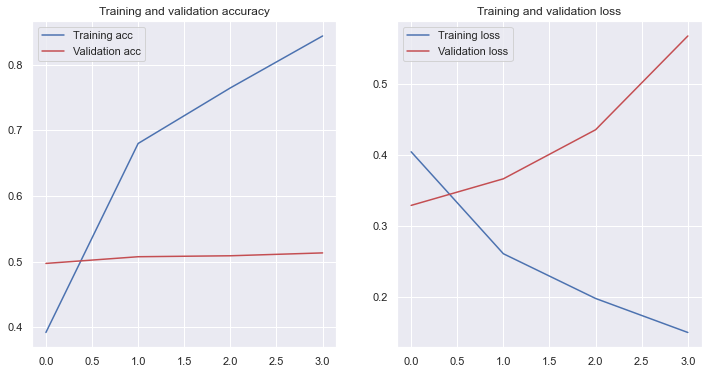

In [36]:
# Vẽ loss và accuracy của training và validation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'b', label='Training acc')
plt.plot(history.history['val_accuracy'], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

## Predict test

In [37]:
# Sử dụng model để predict
y_pred = model.predict(X_test)

In [38]:
y_pred1 = np.argmax(y_pred, axis=1)

In [39]:
# Báo cáo độ chính xác
from sklearn.metrics import classification_report

print(classification_report(label_test, y_pred1))

              precision    recall  f1-score   support

           0       0.33      0.23      0.27        40
           1       0.51      0.62      0.56       132
           2       0.59      0.63      0.61       193
           3       0.77      0.59      0.67        46
           4       0.44      0.42      0.43       129
           5       0.52      0.58      0.55       116
           6       0.85      0.30      0.44        37

    accuracy                           0.54       693
   macro avg       0.57      0.48      0.50       693
weighted avg       0.55      0.54      0.53       693



# Task3: Data Crawl on Youtube

## Read data

In [65]:
# Đọc 3 file excel và gom vào 1 dataframe
allFiles = ["./YoutubeData/cleanVideoData1.xlsx",
           "./YoutubeData/cleanVideoData2.xlsx", 
           "./YoutubeData/cleanVideoData3.xlsx"]

list_df = []

for filename in allFiles:
    df_youtube = pd.read_excel(filename)
    list_df.append(df_youtube)

frame = pd.concat(list_df, axis=0, ignore_index=True)
frame.head()

,Unnamed: 0,Emotion,Sentence
0,0,Enjoyment,mình tuyên_bố ở việt nam giọng đã hay thì cầm ...
1,1,Other,mọi người hát karaoke beat phối mới mặt_trời c...
2,2,Enjoyment,ở việt nam cầm muỗng hát cũng là ca_sĩ nhá
3,3,Enjoyment,có ai thấy bản live này hay hơn bản_chính không
4,4,Enjoyment,tại_sao trước đây tôi lại không biết đến sự tồ...


In [66]:
# Loại bỏ cột dư thừa
frame.drop(columns=["Unnamed: 0"], inplace=True)
frame.head()

,Emotion,Sentence
0,Enjoyment,mình tuyên_bố ở việt nam giọng đã hay thì cầm ...
1,Other,mọi người hát karaoke beat phối mới mặt_trời c...
2,Enjoyment,ở việt nam cầm muỗng hát cũng là ca_sĩ nhá
3,Enjoyment,có ai thấy bản live này hay hơn bản_chính không
4,Enjoyment,tại_sao trước đây tôi lại không biết đến sự tồ...


## Normalize

In [67]:
# Chuẩn hóa label - Emotion
frame.Emotion = encoder.fit_transform(frame.Emotion)
frame.head()

,Emotion,Sentence
0,2,mình tuyên_bố ở việt nam giọng đã hay thì cầm ...
1,4,mọi người hát karaoke beat phối mới mặt_trời c...
2,2,ở việt nam cầm muỗng hát cũng là ca_sĩ nhá
3,2,có ai thấy bản live này hay hơn bản_chính không
4,2,tại_sao trước đây tôi lại không biết đến sự tồ...


In [68]:
# Chia ra làm 2 tập data, label
data_youtube = []
label_youtube = []
for i in range(len(frame)):
    data_youtube.append(frame.Sentence[i])
    label_youtube.append(frame.Emotion[i])

## Vectorizer

In [69]:
# Vector hóa
X_frame = vectorizer.transform(data_youtube).toarray()
print(X_frame.shape)

(303, 3000)


## Model predict data youtube

In [70]:
# Predict data crawl
y_pred_data_youtube = model.predict(X_frame)

In [71]:
y_pred_data_youtube1 = np.argmax(y_pred_data_youtube, axis=1)

In [72]:
print(classification_report(label_youtube, y_pred_data_youtube1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.10      0.67      0.17         6
           2       0.73      0.71      0.72       150
           3       0.00      0.00      0.00         1
           4       0.59      0.24      0.34       109
           5       0.24      0.65      0.35        26
           6       0.00      0.00      0.00         8

    accuracy                           0.51       303
   macro avg       0.24      0.32      0.23       303
weighted avg       0.60      0.51      0.51       303

